# Gradient descent

This is a supplementary information notebook. None of this content needs to be reproduced for the course or the exam but questions could be asked about it during the exam.

In the introduction to linear regression we have seen that for a simple case, we could compute the error made a by a series of models (each model is defined by its parameters). In that case, we can just figure out which model (and thus which parameters) have the lowest error. But in reality, we can rarely do that. We usually rely on searching the solution via gradient descent, i.e. we start from the green point and try to figure out where the minimum (the yellow star) is:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib widget

In [2]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

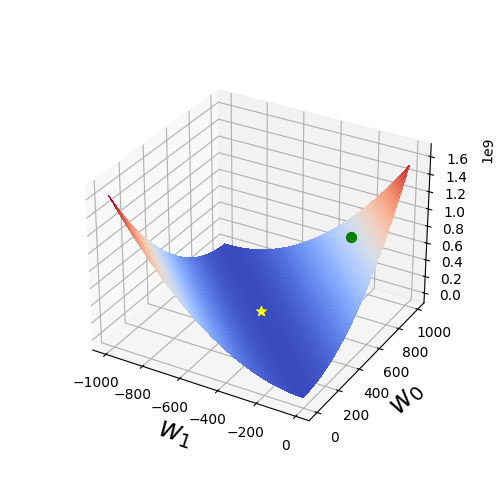

In [3]:
# 1. Specify the different ranges that we want to explore
w0_range = np.arange(-1000, 0, 5)
w1_range = np.arange(0, 1000, 5)

# 2. Create a grid of values for the parameters
grid_0, grid_1 = np.meshgrid(w0_range, w1_range)

# 3. Predict the fixed acidity values for each combination of parameters (w0, w1)
grid_mult = grid_0[:, :, np.newaxis] + grid_1[:, :, np.newaxis] * wine["density"].values

# 4. Compute the squared error for each combination of parameters
grid_mult = (grid_mult - wine["fixed acidity"].values) ** 2
total_error = np.sum(grid_mult, axis=2)

# 5. Find the minimal error
min_loc = np.unravel_index(np.argmin(total_error), total_error.shape)

fig = plt.figure(figsize=(5, 5))

X = grid_0.copy()
Y = grid_1.copy()
Z = total_error.copy()

ax = fig.add_subplot(1, 1, 1, projection="3d", computed_zorder=False)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)  # , vmax=5)

# Add green dot and yellow star to indicate start and goal
ax.scatter([grid_0[180, 150]], [grid_1[180, 150]], [total_error[180, 150]], c="green", marker="o", s=50)
ax.scatter(
    [grid_0[min_loc[0], min_loc[1]]],
    [grid_1[min_loc[0], min_loc[1]]],
    [total_error[min_loc[0], min_loc[1]]],
    c="yellow",
    marker="*",
    s=50,
)

ax.set_xlabel("$w_1$", fontdict={"fontsize": 20})
ax.set_ylabel("$w_0$", fontdict={"fontsize": 20});

How do we now reach the bottom of the valley from this point? It's also important to remember that we don't *see* the whole surface. It's as if we were on a snowy mountain in the fog: we see a few meters from our current position and the only information we have is the direction of the slope.

To simplify things, let's just look at a 1d example where our error as a function of a single parameter $w_0$ looks like a parabola: $e = x^2$ where $e$ is the error and $x$ the single parameter of the model. Here again we want to find the bottom of the valley. Let's also start from a random point (green), in this example we choose $w_0 = 7.5$:

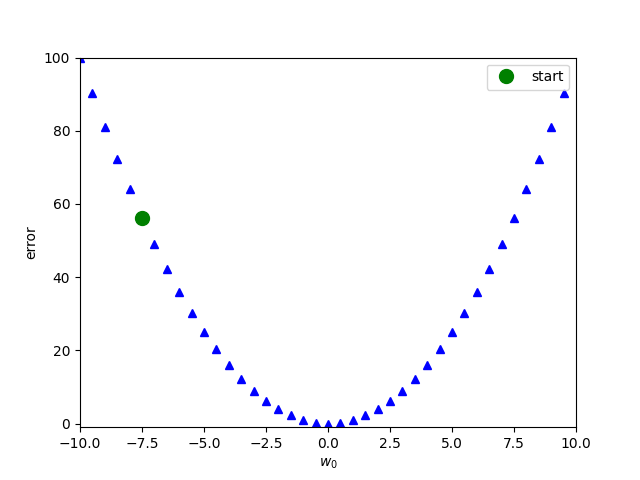

In [4]:
def parabola(x):
    return x**2

w0_range = np.arange(-10, 10, 0.5)
error = parabola(np.arange(-10, 10, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error,'b^')
ax.plot([-7.5], [parabola(-7.5)], 'go', label='start', markersize=10);
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We can now slide along the slope until we find the bottom. Again remember that we don't "see" the whole curve, and therefore at this moment we only see our current position:

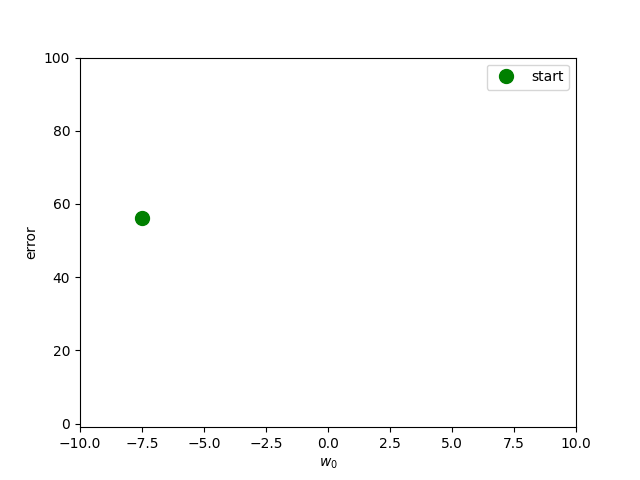

In [5]:
w0_range = np.arange(-7.5, -7.5, 0.5)
error = parabola(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([-7.5], [parabola(-7.5)], 'go', markersize=10, label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

What we can do is slightly vary the value of our current choice of $w_0$ and estimate the error. This would give us the following information. Let's create two points around $w_0=-7.5$

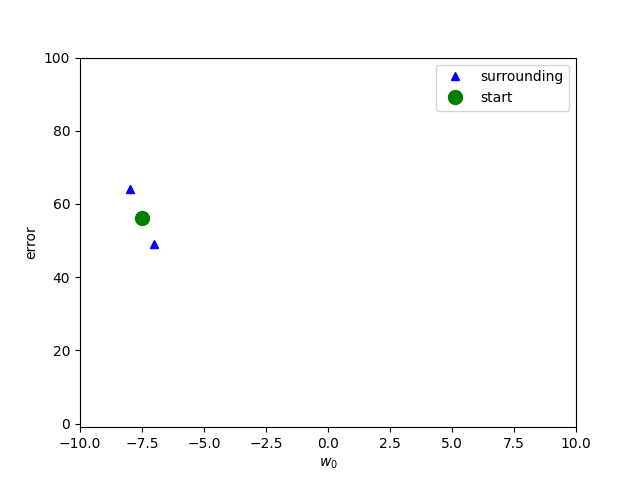

In [6]:
w0_range = np.arange(-8, -6.5, 0.5)
error = parabola(np.arange(-8, -6.5, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding')
ax.plot([-7.5], [parabola(-7.5)], 'go', markersize=10, label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We now have our current point, plus some information on the local surroundings. In particular we see now in which direction we should go to decrease the error: to the right, i.e. larger values of $w_0$.

If we want to follow the slope, we can just estimate it by drawing a line between the close-by points and calculate the slope of that line: 

In [7]:
slope = (error[1]-error[0]) / (w0_range[1]-w0_range[0])
slope

np.float64(-15.5)

Now we know that if we move to the right, i.e. use **larger $w_0$ values** (which corresponds to a **negative slope**), the **error will decrease**. If at some point the slope becomes positive, it means that we have to move to the left, i.e. make $w_0$ smaller, otherwise we are increasing the error again. Therefore, we can use the slope to update the value of $w_0$. We can say that $w_0^{\texttt{new}} = w_0 - \texttt{lr} \cdot \texttt{slope}$ with $\texttt{lr}$ being a multiplicative factor called *learning rate*, e.g. 0.1. Thus we get:

In [8]:
w_0_new = -7.5 - slope * 0.1

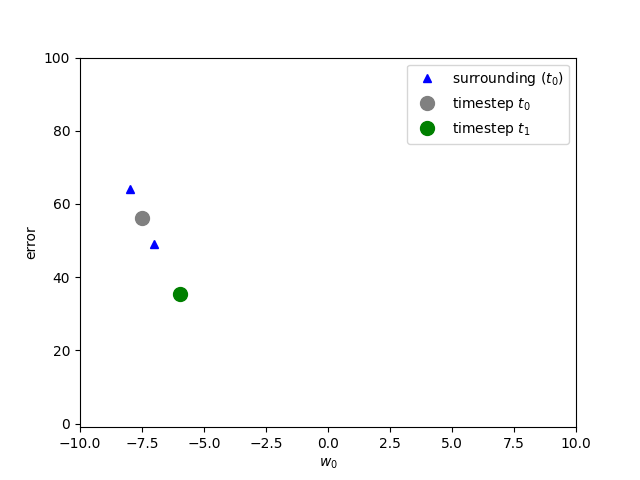

In [9]:
w0_range = np.arange(-8, -6.5, 0.5)
error = parabola(np.arange(-8, -6.5, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding ($t_0$)')
ax.plot([-7.5], [parabola(-7.5)], 'o', color='gray', markersize=10, label='timestep $t_0$');
ax.plot([w_0_new], [parabola(w_0_new)], 'go', markersize=10, label='timestep $t_1$');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We have moved in the right direction! Now we can repeat the operation. Compute surrounding points, the local slope and update the value of $w_0$:

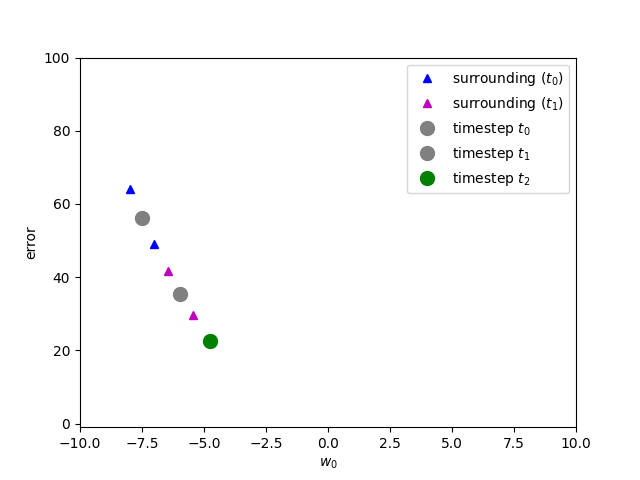

In [10]:
w0_range2 = np.arange(w_0_new-0.5, w_0_new+0.6, 0.5)
error2 = parabola(w0_range2)
slope = (error2[-1]-error2[0]) / (w0_range2[-1]-w0_range2[0])

fig, ax = plt.subplots()

previous_w_0 = w_0_new
w_0_new = w_0_new - slope * 0.1

ax.plot(w0_range, error, "b^", label="surrounding ($t_0$)")
ax.plot(w0_range2, error2, "m^", label="surrounding ($t_1$)")

ax.plot([-7.5], [parabola(-7.5)], "o", color="gray", markersize=10, label="timestep $t_0$")
ax.plot([previous_w_0], [parabola(previous_w_0)], "o", color="gray", markersize=10, label="timestep $t_1$")
ax.plot([w_0_new], [parabola(w_0_new)], "go", markersize=10, label="timestep $t_2$")

ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We can repeat now the operation until we reach the bottom of the valley. Notice that when we reach to bottom, the slope should be close to zero and therefore we should stop moving automatically! We can plot the entire series of updated values for $w_0$:

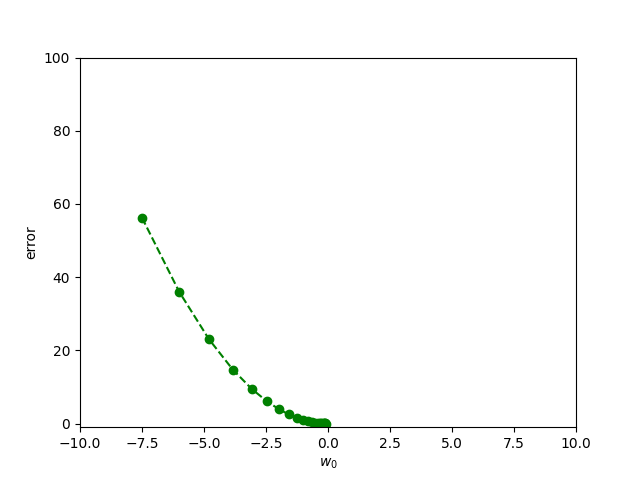

In [11]:
fig, ax = plt.subplots()
w_0_vals = [-7.5]
error_vals = [parabola(w_0_vals[0])]

for i in range(20):  
    w0_range = np.arange(w_0_vals[-1]-0.5, w_0_vals[-1]+0.6, 0.5)
    error = parabola(w0_range)
    slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])

    w_0_new = w_0_vals[-1] - slope * 0.1
    w_0_vals.append(w_0_new)
    error_vals.append(parabola(w_0_new))

ax.plot(w_0_vals, error_vals, 'go--');

ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error');

We clearly reach the bottom and we also clearly see that when the slope decreases, the steps we take keep getting smaller.

This type of method where we use the local slope to search for the minimum is called **gradient descent**. The gradient is a general term for slope in the case where we deal with more than one variable (like in the surface shown previously) and descent means going down. There are many ways to computer the slope, update the parameters etc. and we won't go into such details. 

The important idea here is that we use the local slope information to reach a global minimum. Most of the time you will hear about Stochastic Gradient Descent (SGD) which uses this approach but where only a fraction (a so called *batch*) of the data is used at each iteration. This is particularly relevant when using very large amounts of data.

## Potential problems

When using any type of Machine Learning algorithm, one has to know about its limitations and typical pitfalls. Some of them are common to many algorithms and some are method specific.

### Initial conditions

When we executed the fit with the standard linear regression, we could just use ```res = model.fit(X=X, y=y)``` but when we used the gradient descent method above, we had to use
```res = model.fit(X=X, y=y, coef_init=600, intercept_init=-600)```, i.e. we had to manually specify a starting point with ```coef_init``` and ```intercept_init```. This is because unlike the standard method, gradient descent actually *searches* for a solution, and if we start too far away, we might never find it. Let's try without:

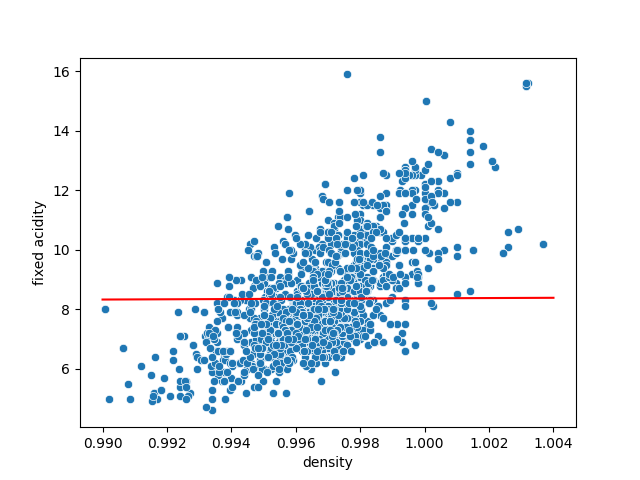

In [12]:
from sklearn.linear_model import SGDRegressor

X = wine[['density']]
y = wine['fixed acidity']

model = SGDRegressor()
res = model.fit(X=X, y=y)

fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), res.intercept_ + np.arange(0.99, 1.004, 0.001)*res.coef_[0], 'r');

Clearly gradient descent didn't find the correct solution. There are mainly two reasons that could explain this: we didn't do enough steps or the algorithm found another "not too bad" solution and couldn't escape it.

We can try to adjust the number of iterations:

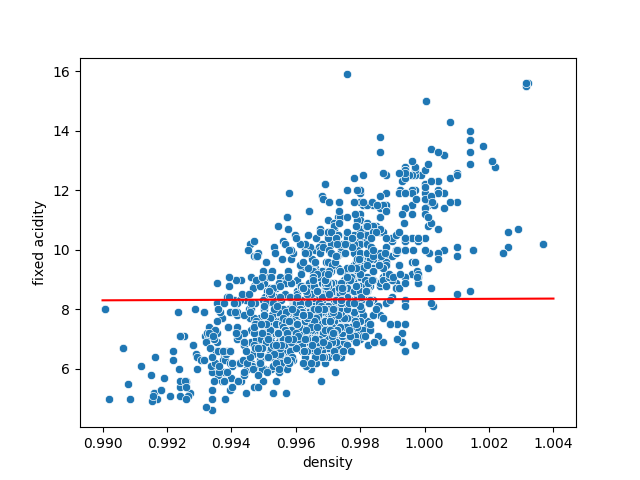

In [13]:
model = SGDRegressor(max_iter=10000)

fig, ax = plt.subplots()
res = model.fit(X=X, y=y)
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), res.intercept_ + np.arange(0.99, 1.004, 0.001)*res.coef_[0], 'r');

It doesn't seem to do much to solve our problem, so we are probably trapped in some local minimum. To understand this, let's imagine that our 1D erro plot looks like this:

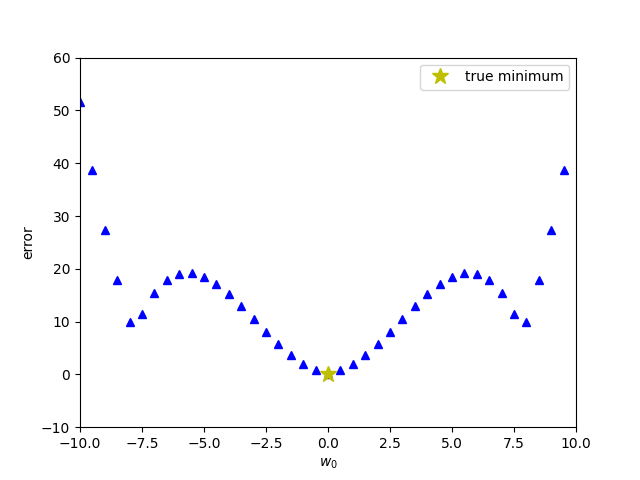

In [14]:
w0_range = np.arange(-10, 10, 0.5)
def error_fun(x):
    return x**2 * np.abs(np.cos(4*x/20)) + np.abs(x)/1
error = error_fun(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], error_fun(np.array([0])), 'y*', markersize=12, label='true minimum');
#ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
ax.set(xlim=[-10,10], ylim=[-10,60], xlabel='$w_0$', ylabel='error')
ax.legend();

If we start our search too far on the left or the right and follow the slope, we will end up in one of the local minima. For example, if we start at $w_0 = -6$ we will end up in the local minimum on the left:

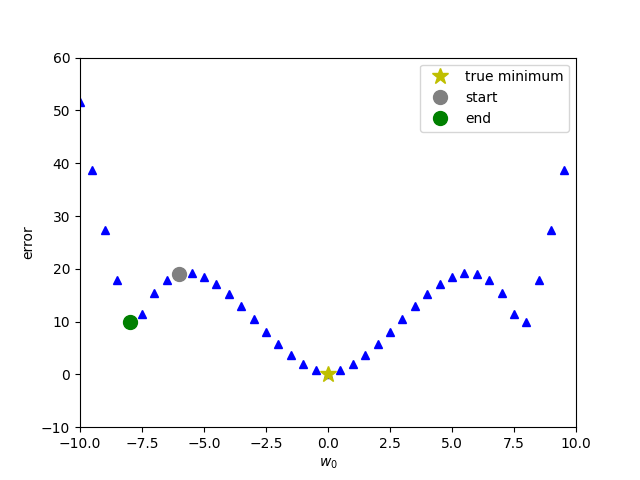

In [15]:
fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], [0], "y*", markersize=12, label="true minimum")
ax.plot([-6], [error_fun(-6)], 'o', color="gray", markersize=10, label='start');
ax.plot([-8], [error_fun(-8)], 'go', markersize=10, label='end');
ax.set(xlim=[-10,10], ylim=[-10,60], xlabel='$w_0$', ylabel='error')
ax.legend();

So in this case we would have to specify an initial condition, e.g. $w_0=-5$. Note that there are alternatives to take care of this. For example one can run the optimization several times from different initial points and keep the *lowest* of the found minima, or we can add some noise at each step to help the optimizer get over small "hills".

### Flat gradient

As we use the gradient to reach the minimum, if the error curve is flat *somewhere else* than at the true minimum, it can start to wander randomly as there is no slope anymore to follow. This would be the case for example with an error like this: 

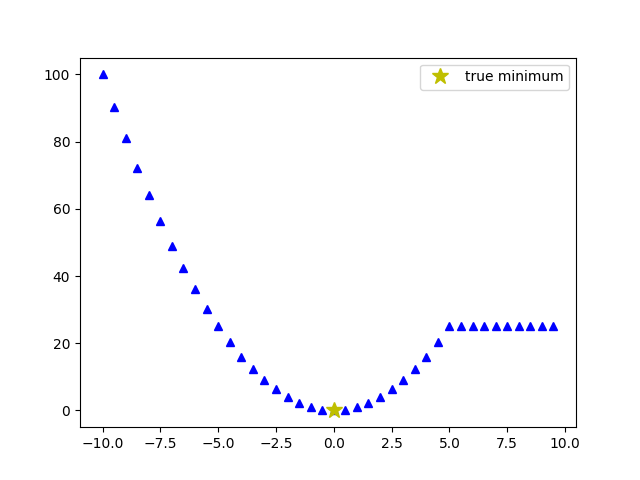

In [16]:
w0_range = np.arange(-10, 10, 0.5)
def error_fun(x):
    out = x**2
    out[x > 5]=25
    return out
error = error_fun(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], error_fun(np.array([0])), 'y*', markersize=12, label='true minimum');
ax.legend();

If we start here around $w_0=7.5$ for example, the slope is zero and therefore the step to compute the new parameter value $w_0^{new} = w_0 - lr * slope$ is zero: we don't converge to the solution.

### Over-shooting solution

The *learning rate* parameter in our weight update formula $w_0^{\texttt{new}} = w_0 - \texttt{lr} \cdot \texttt{slope}$ is very important in that it dictates how big we want the update/step to be. If it is too small, then it will take forever to find the solution. If it is too large, there's a risk that we miss the solution because we move too fast. For example if we use again our loop above but use a larger learning rate, then sequence of steps is:

In [17]:
def plot_gradient_descent(w0_range, w0_start, error_function, learning_rate=0.8, n_iter=20, print_steps=True):
    """
    Plot the gradient descent steps for a given error function and learning rate.
    
    Parameters
    ----------
    w0_range : np.array
        The range of w0 values to consider.
    w0_start : float
        The starting value for w0.
    error_function : function
        The error function to minimize.
    learning_rate : float
        The learning rate for the weight update.
    n_iter : int
        The number of iterations (gradient descent steps) to perform.
    print_steps : bool
        Whether to print information about each step.
    """
    fig, ax = plt.subplots()

    error = error_function(w0_range)
    ax.plot(w0_range, error, 'b^')

    w_0_vals = [w0_start]
    error_vals = [error_function(w0_start)]

    for i in range(n_iter):
        w0_range_local = np.arange(w_0_vals[-1] - 0.5, w_0_vals[-1] + 0.6, 0.5)
        local_error = error_function(w0_range_local)
        slope = (local_error[-1] - local_error[0]) / (w0_range_local[-1] - w0_range_local[0])

        w_0_new = w_0_vals[-1] - slope * learning_rate
        w_0_vals.append(w_0_new)
        error_new = error_function(w_0_new)
        error_vals.append(error_new)

        print(f"Step {i+1}: w0={w_0_new}, error={error_new}")

    ax.plot(w_0_vals, error_vals, "go--")
    ax.set(xlim=[w0_range.min()-0.5, w0_range.max()+0.5], ylim=[error.min(), error.max()], xlabel="$w_0$", ylabel="error")
    plt.show()

Step 1: w0=4.5, error=20.25
Step 2: w0=-2.7, error=7.290000000000001
Step 3: w0=1.620000000000001, error=2.624400000000003
Step 4: w0=-0.9720000000000009, error=0.9447840000000016
Step 5: w0=0.5832000000000006, error=0.3401222400000007
Step 6: w0=-0.34992000000000045, error=0.12244400640000032
Step 7: w0=0.20995200000000025, error=0.044079842304000104
Step 8: w0=-0.12597120000000017, error=0.015868743229440044
Step 9: w0=0.0755827200000001, error=0.0057127475625984156
Step 10: w0=-0.045349632000000084, error=0.0020565891225354316
Step 11: w0=0.027209779200000048, error=0.0007403720841127553
Step 12: w0=-0.0163258675200001, error=0.0002665339502805942
Step 13: w0=0.009795520512000049, error=9.595222210101369e-05
Step 14: w0=-0.005877312307200042, error=3.454279995636508e-05
Step 15: w0=0.003526387384319953, error=1.2435407984290922e-05
Step 16: w0=-0.002115832430591889, error=4.476746874344382e-06
Step 17: w0=0.0012694994583551406, error=1.6116288747639954e-06
Step 18: w0=-0.00076169967

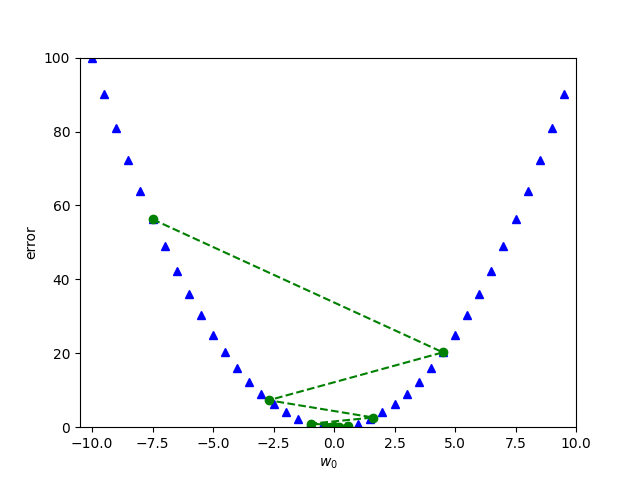

In [18]:
plot_gradient_descent(
    w0_range=np.arange(-10, 10, 0.5),
    w0_start=-7.5,
    error_function=parabola
)

We see that we still converge to the final solution, but we hop from one side to the other of the error plot. In this toy example, we were lucky that the error function is just a parabola with one global minimum. If the error function is more complex, we might never find the global minimum. Below you can see an example of this when we assume that the error function has multiple local minima (the function that you have seen before):

Step 1: w0=9.237679735892183, error=32.552900357053545
Step 2: w0=-6.484931777361355, error=17.85648555086506
Step 3: w0=-9.034725639995868, error=28.132011833018822
Step 4: w0=5.735740959672402, error=19.260038203512458
Step 5: w0=5.974677658483428, error=19.078012455678575
Step 6: w0=6.893051707202013, error=15.968498413533045
Step 7: w0=10.911943766312291, error=79.27889603810802
Step 8: w0=-12.169776250683721, error=124.71355809549375
Step 9: w0=14.890987261279694, error=233.67904218431104
Step 10: w0=-11.32309992019351, error=93.31268073406545
Step 11: w0=13.267303164681838, error=168.73118204115445
Step 12: w0=-15.309815349350778, error=248.95753422195244
Step 13: w0=9.257956144673798, error=33.0098002887908
Step 14: w0=-6.559667000390103, error=17.574355413926003
Step 15: w0=-9.36805265036886, error=35.53886911163667
Step 16: w0=6.964734353516157, error=15.546363615708993
Step 17: w0=11.255526349316092, error=90.94577821900074
Step 18: w0=-13.098998913343053, error=161.849594380

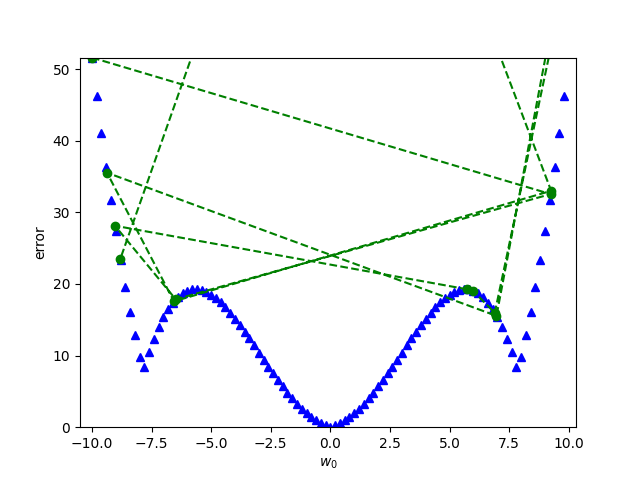

In [19]:
def error_fun(x):
    return x**2 * np.abs(np.cos(4 * x / 20)) + np.abs(x) / 1

plot_gradient_descent(
    w0_range=np.arange(-10, 10, 0.2),
    w0_start=-10,
    error_function=error_fun,
    learning_rate=0.7,
)

## Considerations

We have seen only a tiny fraction of existing linear regression methods. However these simple examples have allowed us to learn fundamental concepts:
- metrics: how do we measure the quality of our model. In this case we used the sum of squared errors
- gradient descent: using the local slope to find the minimum in the error and therefore the best parameters
- potential pitfalls like vanishing gradients (no slope), learning rate etc.

Note that all these concept will reappear in other methods, in particular in the most advanced ones like Deep Learning.

## Exercise

Use the `plot_gradient_descent` function together with the previously defined `error_fun` error function and solve the following tasks:

1. Set your range for the $w_0$ values in the plot from $-20$ to $20$. Then start at $w_0 = -12$ with a learning rate of $0.7$ and perform gradient descent. How many iterations do you need to find the minimum? Start with 10 iterations and then gradually increase until you found a number that works. You can juste execute the same cell multiple times with different `n_iter` values.
2. Now in another cell, use the same arguments for `plot_gradient_descent`, but this time change the learning rate to $0.2$. You will see that you find the minimum much faster. How many steps do you need now? Try to decrease the steps until you don't find the minimum anymore.

# Solutions

Through trial and error (or by choosing a large `n_iter` and then looking at the step information that can be printed) we see that we come closest to the minimum after 25 iterations. Afterwards, the search diverges again.

Step 1: w0=14.644580280466155, error=224.27632577657158
Step 2: w0=-12.330169477996652, error=130.9703479692318
Step 3: w0=15.082921854202258, error=240.8022305447833
Step 4: w0=-10.432520934551462, error=64.1058145561646
Step 5: w0=10.698090450974842, error=72.34494232146278
Step 6: w0=-11.535796415187093, error=100.9083797184396
Step 7: w0=13.762885445702047, error=189.02720783414162
Step 8: w0=-14.730763539328596, error=227.5950708137057
Step 9: w0=11.995193814758856, error=118.0013781894215
Step 10: w0=-14.636980130340106, error=223.98221566950522
Step 11: w0=12.358825461099642, error=132.0965449417526
Step 12: w0=-15.112878398497074, error=241.89623932480276
Step 13: w0=10.285039344830928, error=59.71485121129912
Step 14: w0=-10.212021795819563, error=57.59089408783437
Step 15: w0=9.966523998937632, error=50.69740975339122
Step 16: w0=-9.120647870131265, error=29.96979288300826
Step 17: w0=6.053064139649949, error=18.966538140370446
Step 18: w0=7.2063493958050815, error=13.9140556

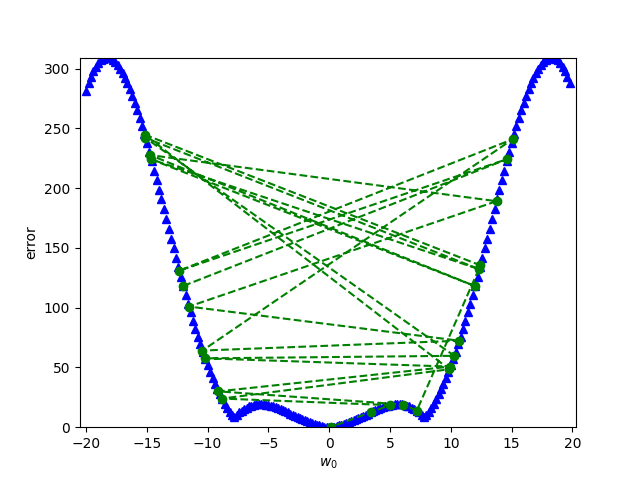

In [20]:
# Exercise 1
plot_gradient_descent(
    w0_range=np.arange(-20, 20, 0.2),
    w0_start=-12,
    error_function=error_fun,
    learning_rate=0.7,
    n_iter=25,
)

For exercise 2, we can see that with a learning rate of $0.2$, 7 steps are already enough to come close to the minimum. With each other step, we come closer to the true minimum 0.

Step 1: w0=-4.38726277700967, error=16.68894769613337
Step 2: w0=-3.670134112450299, error=13.671294325615793
Step 3: w0=-2.7525810896725686, error=9.209860689187543
Step 4: w0=-1.7824106716732775, error=4.759662151761685
Step 5: w0=-0.9653664605382504, error=1.8799827953491004
Step 6: w0=-0.39734434265027774, error=0.554728593754942
Step 7: w0=-0.08205503169544459, error=0.0887871532689517


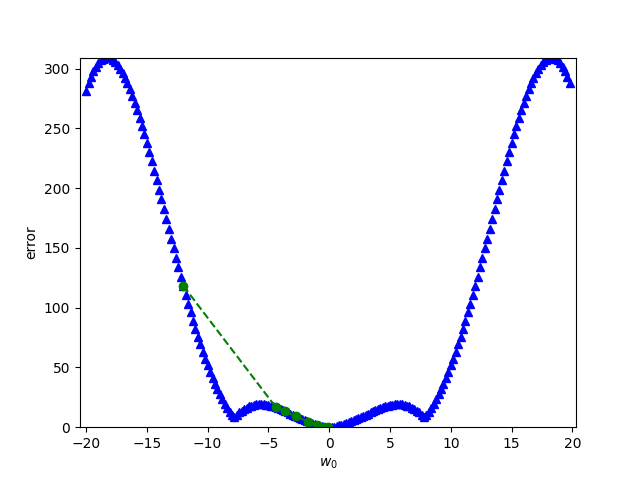

In [21]:
# Exercise 2
plot_gradient_descent(
    w0_range=np.arange(-20, 20, 0.2),
    w0_start=-12,
    error_function=error_fun,
    learning_rate=0.2,
    n_iter=7,
)